<a href="https://colab.research.google.com/github/tarutear/2025-1/blob/main/Introduction_to_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to R
## 패키지 불러오기

In [59]:
## 데이터 전처리를 위한 패키지
library(dplyr)

## 데이터 분석 및 시각화를 위한 패키지
library(tidyverse)


패키지가 컴퓨터에 설치되어 있지 않을 때에는 install.packages("패키지명")을 통해 설치 후 library(패키지)

In [ ]:
library(corrplot)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [ ]:
install.packages("corrplot")
library(corrplot)

## 변수

변수 이름 규칙
1. 변수명은 알파벳, 숫자, _(언더스코어), .(마침표)로 구성되며, -(하이픈)은 사용할 수 없다.
2. 첫 글자는 알파벳 또는 .으로 시작해야 한다. 만약.으로 시작한다면 . 뒤에는 숫자가 올 수 없다.
 <br> ex) .x (O) / .2 (x)


 변수값을 할당할 때에는 <- 를 활용 <br>
  x <- 3

In [ ]:
## 올바른 예

x <- 3
.x <- 3

## 잘못된 예
.2 <- 3
2 <- 3

## 스칼라

스칼라란 단일 차원의 값을 뜻하는 것으로 숫자 1,2,3, …을 예로 들 수 있다.

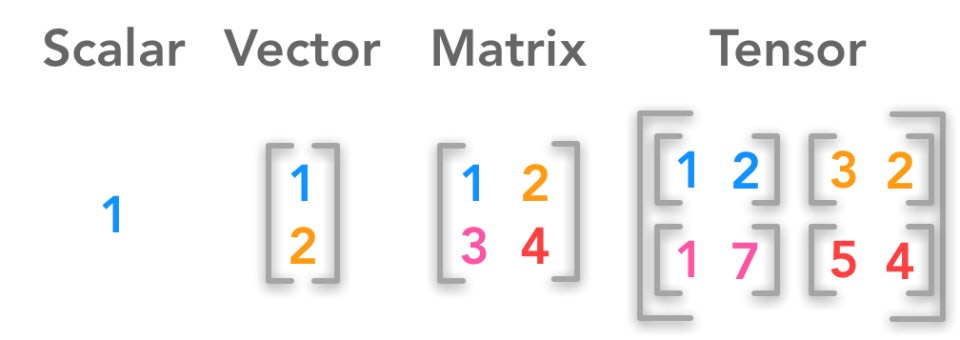

R의 기본형은 벡터이므로, 스칼라자료는 길이가 1인 벡터

In [ ]:
a <- 3
b <- 4.5
c <- a+b
print(c)

## NA
만약 데이터에 값이 존재하지 않는다면 NA로 표시할 수 있다.

In [ ]:
one <- 100
two <- 75
three <- 80
four <- NA

is.na(four)

In [ ]:
T <- tibble(index = 1:4, score = c(100,75,80,NA))
print(T)
is.na(T)

# 결측치 처리

In [60]:
install.packages("NHANES")
library(NHANES)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(NHANES)

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51625,2009_10,male,4,0-9,49,Other,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
51630,2009_10,female,49,40-49,596,White,NA,Some College,LivePartner,⋯,No,NA,Yes,Yes,12,10,1,Yes,Heterosexual,NA
51638,2009_10,male,9,0-9,115,White,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [61]:
nhanes <- NHANES %>% mutate(missing_phys_active = is.na(PhysActive))

In [ ]:
missing_male <- nhanes %>% filter(Gender == "male") %>% pull(missing_phys_active)
missing_female <- nhanes %>% filter(Gender == "female") %>% pull(missing_phys_active)

In [ ]:
t.test(missing_male, missing_female)


	Welch Two Sample t-test

data:  missing_male and missing_female
t = 1.7328, df = 9982.9, p-value = 0.08316
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001697928  0.027576742
sample estimates:
mean of x mean of y 
0.1738956 0.1609562 


In [ ]:
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [57]:
install.packages("VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(naniar)
library(VIM)

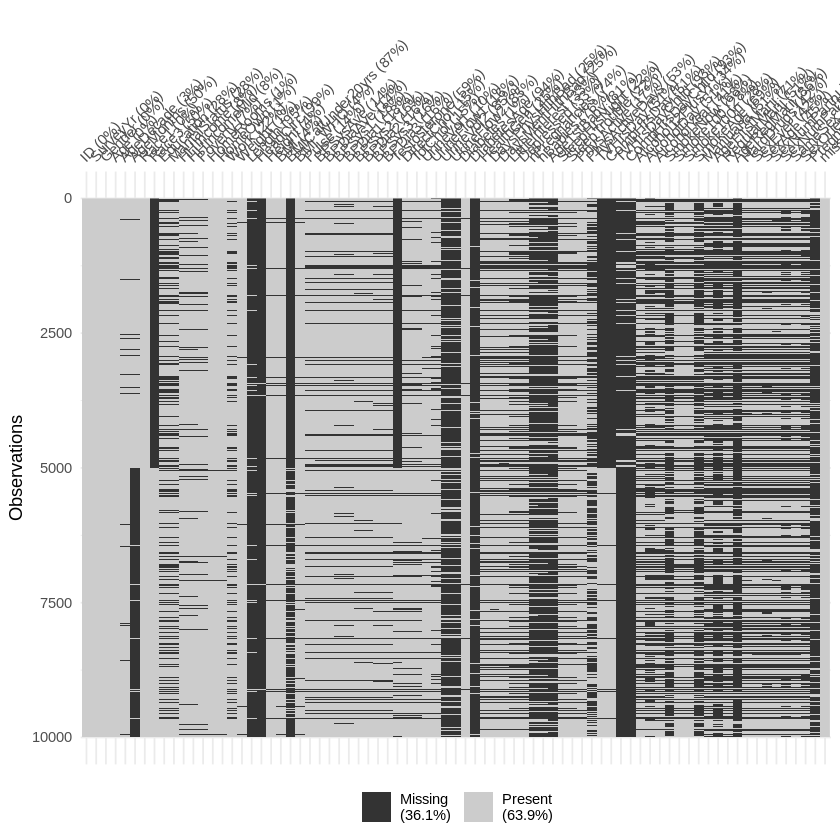

In [ ]:
nhanes %>% vis_miss()

In [62]:
nhanes_imp <- nhanes %>% mutate(height_imp = ifelse(is.na(Height), TRUE, FALSE)) %>%
  mutate(weight_imp = ifelse(is.na(Weight), TRUE, FALSE)) %>%
  mutate(height = ifelse(height_imp, mean(Height, na.rm = TRUE), Height)) %>%
  mutate(weight = ifelse(weight_imp, mean(Weight, na.rm = TRUE), Weight)) %>%
  select(weight, height, height_imp, weight_imp)

[1] 78

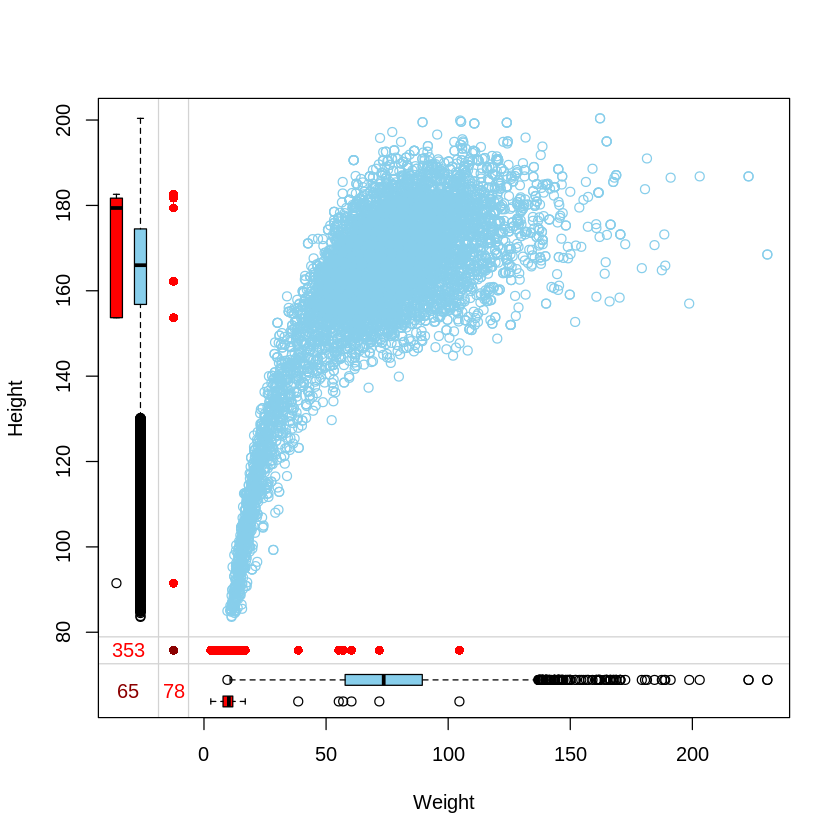

[1] 0

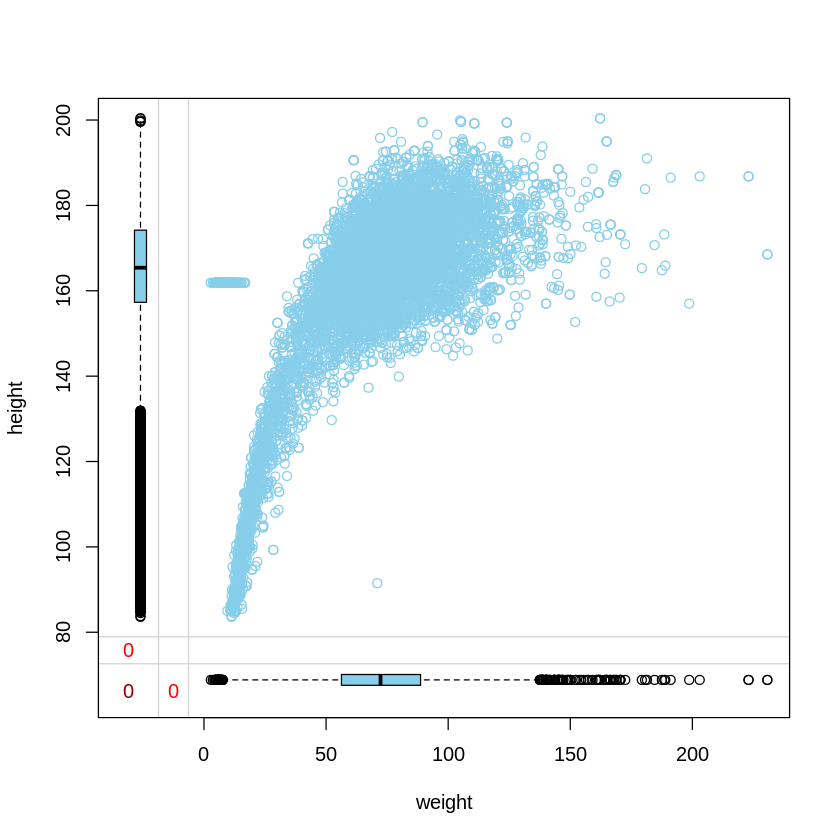

In [ ]:
nhanes %>% select(Weight, Height) %>% marginplot()
sum(is.na(nhanes$Weight))
nhanes_imp %>% select(weight, height) %>% marginplot()
sum(is.na(nhanes_imp$weight))

In [63]:
nhanes_imp <- as.data.frame(nhanes_imp)

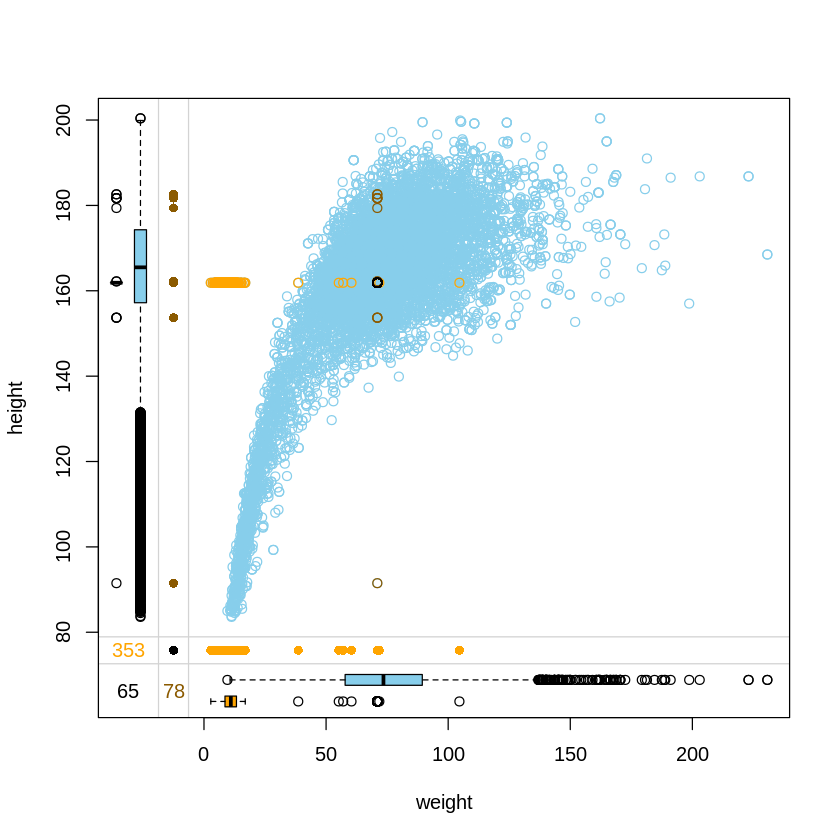

In [64]:
nhanes_imp %>% select(weight, weight_imp, height, height_imp) %>% marginplot(delimiter = "_imp")

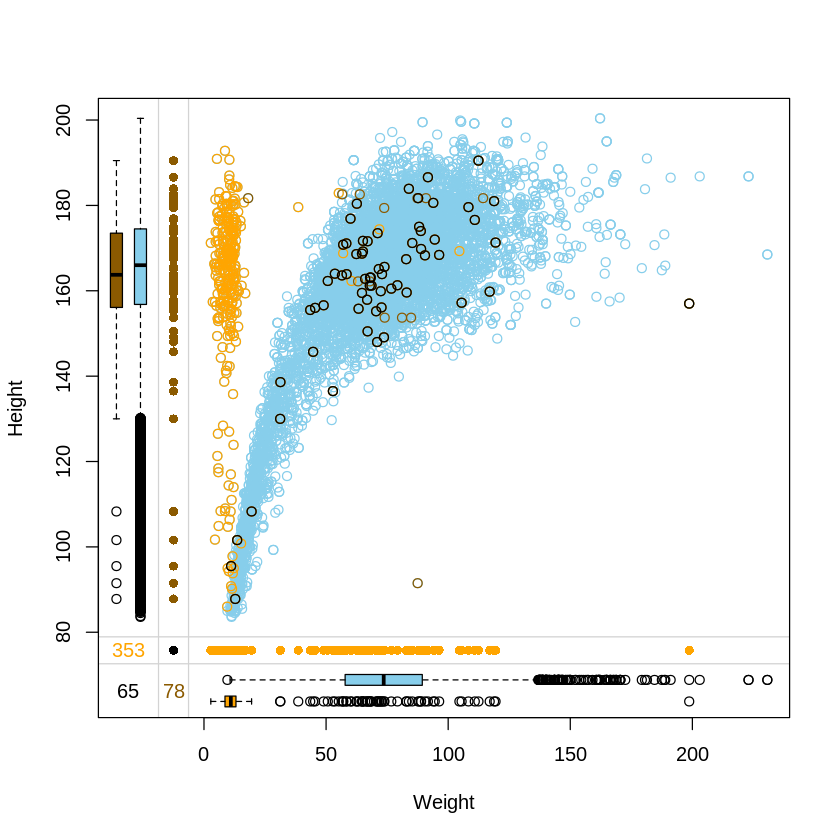

In [67]:
nhanes_imp <- hotdeck(nhanes, variable = c("Height", "Weight"))
nhanes_imp %>% select(Weight, Weight_imp, Height, Height_imp) %>% marginplot(delimiter = "_imp")

Imputing within domains

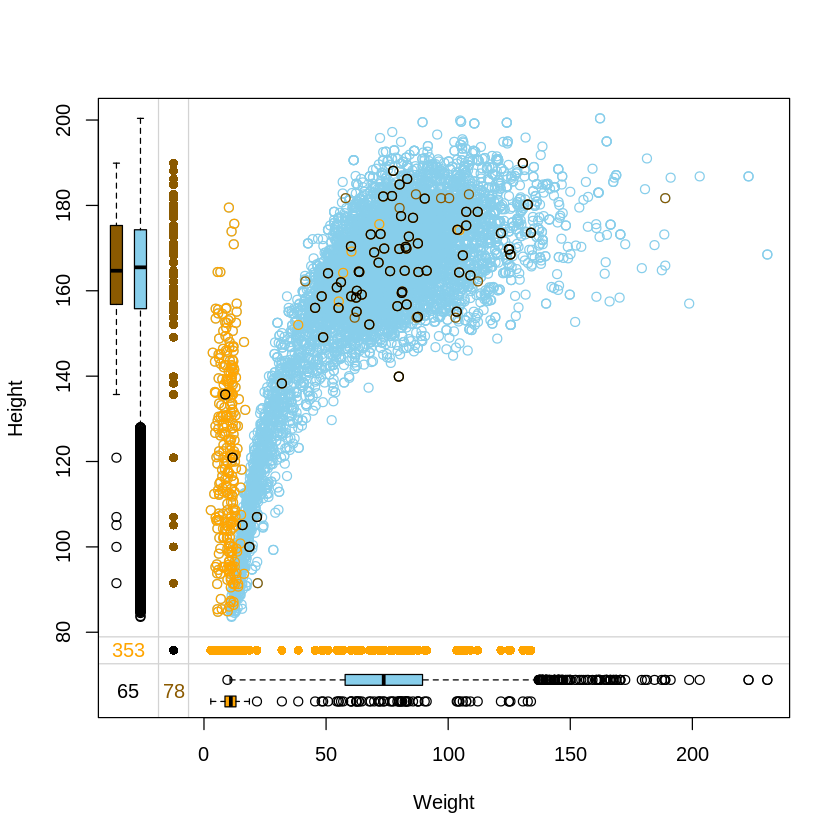

In [71]:
nhanes_imp <- hotdeck(nhanes, variable = c("Height","Weight"), domain_var = "PhysActive")
nhanes_imp %>% select(Weight, Weight_imp, Height, Height_imp) %>% marginplot(delimiter = "_imp")

Sorting by correlated variables

Warning message in imputeHD(.SD, variableX = variable, varTypeX = varType, imp_varX = imp_var, :
“For variable Height the ordering is ignored for at least one imputation.”


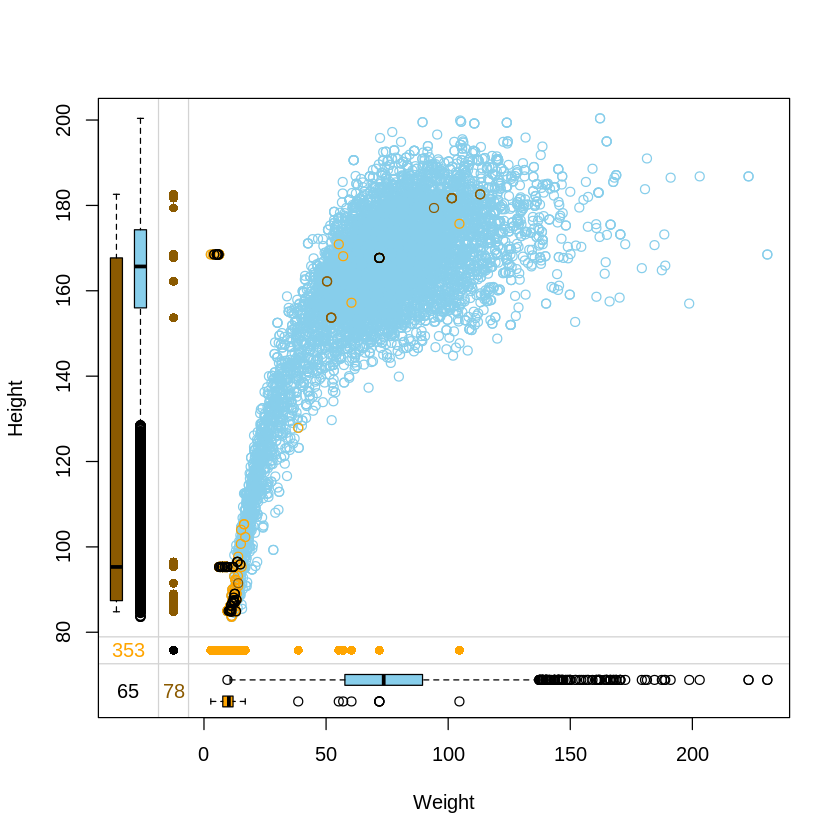

In [75]:
nhanes_imp <- hotdeck(nhanes, variable = "Weight", ord_var = "Height")
nhanes_imp <- hotdeck(nhanes_imp, variable = "Height", ord_var = "Weight")
nhanes_imp %>% select(Weight, Weight_imp, Height, Height_imp) %>% marginplot(delimiter = "_imp")

# k-Nearest_Neighbors imputation

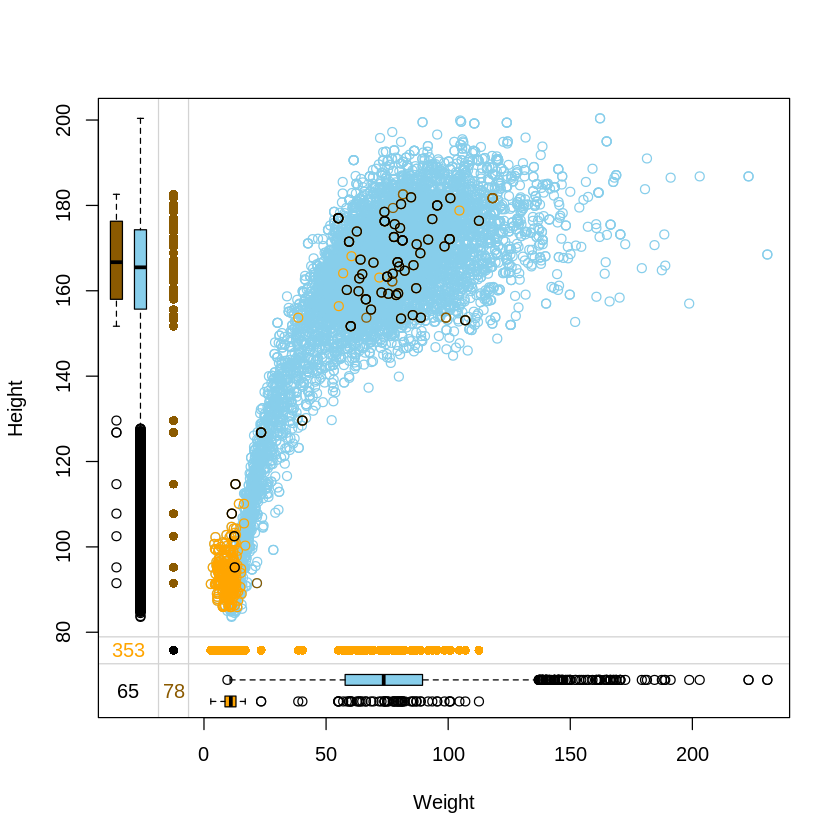

In [77]:
nhanes_imp <- kNN(nhanes, k = 5, variable = c("Weight", "Height"))
nhanes_imp %>% select(Weight, Weight_imp, Height, Height_imp) %>% marginplot(delimiter = "_imp")